Introduction & Libraries

In [219]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [220]:
!pip install xgboost


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [221]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.holiday import USFederalHolidayCalendar
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

#Preparing the data

Loading the dataset

In [222]:
test = pd.read_csv('/content/test.csv')
train = pd.read_csv('/content/train.csv')
original = pd.read_csv('/content/train__dataset original data.csv')

In [223]:
train['is_generated'] = 1
test['is_generated'] = 1
original['is_generated'] = 0

In [224]:
train.head(5)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,is_generated
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0,1
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0,1
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0,1
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0,1
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1,1


In [225]:
test.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,is_generated
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2,1
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0,1
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0,1
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0,1


In [226]:
original.head(9)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,is_generated
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1,0
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1,0
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1,0
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0,0
5,2,0,2,3,0,0,1,51,2018,9,18,1,0,0,0,149.40,1,0,0
6,1,0,0,2,0,0,4,7,2018,2,5,2,0,0,0,86.00,0,0,0
7,2,0,1,3,2,0,0,61,2018,11,21,1,0,0,0,120.70,1,0,0
8,2,0,2,2,0,0,1,32,2018,9,25,1,0,0,0,134.78,1,0,0


In [227]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [228]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28068 entries, 0 to 28067
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    28068 non-null  int64  
 1   no_of_adults                          28068 non-null  int64  
 2   no_of_children                        28068 non-null  int64  
 3   no_of_weekend_nights                  28068 non-null  int64  
 4   no_of_week_nights                     28068 non-null  int64  
 5   type_of_meal_plan                     28068 non-null  int64  
 6   required_car_parking_space            28068 non-null  int64  
 7   room_type_reserved                    28068 non-null  int64  
 8   lead_time                             28068 non-null  int64  
 9   arrival_year                          28068 non-null  int64  
 10  arrival_month                         28068 non-null  int64  
 11  arrival_date   

In [229]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18137 entries, 0 to 18136
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          18137 non-null  int64  
 1   no_of_children                        18137 non-null  int64  
 2   no_of_weekend_nights                  18137 non-null  int64  
 3   no_of_week_nights                     18137 non-null  int64  
 4   type_of_meal_plan                     18137 non-null  int64  
 5   required_car_parking_space            18137 non-null  int64  
 6   room_type_reserved                    18137 non-null  int64  
 7   lead_time                             18137 non-null  int64  
 8   arrival_year                          18137 non-null  int64  
 9   arrival_month                         18137 non-null  int64  
 10  arrival_date                          18137 non-null  int64  
 11  market_segment_

In [230]:
train.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,is_generated
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.0
mean,21049.500000,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019,1.0
std,12153.367503,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,10524.750000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000,1.0
50%,21049.500000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000,1.0
75%,31574.250000,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000,1.0
max,42099.000000,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000,1.0


In [231]:
test.describe()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,is_generated
count,28068.000000,28068.000000,28068.000000,28068.00000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.000000,28068.0
mean,56133.500000,1.915313,0.140872,0.88877,2.387559,0.234110,0.027006,0.430668,103.845554,2017.856705,7.583903,15.867643,0.725951,0.030711,0.024975,0.196736,104.644460,0.573643,1.0
std,8102.678014,0.526279,0.447277,0.87825,1.403213,0.581256,0.162103,0.830187,81.134833,0.350380,2.831911,8.934570,0.629044,0.172537,0.410583,1.941456,36.818948,0.769765,0.0
min,42100.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,49116.750000,2.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,1.0
50%,56133.500000,2.000000,0.000000,1.00000,2.000000,0.000000,0.000000,0.000000,92.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.0
75%,63150.250000,2.000000,0.000000,2.00000,3.000000,0.000000,0.000000,1.000000,154.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.0
max,70167.000000,4.000000,9.000000,6.00000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.0


In [232]:
original.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,is_generated
count,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.000000,18137.0
mean,1.846777,0.107515,0.811104,2.208965,0.318465,0.031648,0.336770,85.377405,2017.820698,7.432762,15.660804,0.806197,0.025087,0.022440,0.151403,103.478868,0.617522,0.327618,0.0
std,0.516020,0.408901,0.873470,1.426365,0.629140,0.175066,0.772865,86.611736,0.383616,3.076999,8.772788,0.645972,0.156393,0.370078,1.714135,35.474103,0.787941,0.469357,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000,0.0
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000,0.0
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,127.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.270000,1.000000,1.000000,0.0
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000,0.0


In [233]:
train.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
is_generated                            0
dtype: int64

In [234]:
test.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
is_generated                            0
dtype: int64

In [235]:
original.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
is_generated                            0
dtype: int64

In [236]:
print([col for col in train.columns if col not in original.columns])
print([col for col in train.columns if col not in test.columns])

['id']
['booking_status']


In [237]:
# combine our two training datasets
combined_df = pd.concat([train, original], axis=0, ignore_index=True)

Remove True Duplicates

In [238]:
# work out how many true duplicates we have, we need to remove is_generated and id for this
temp_combined_df = combined_df.drop(axis=1, columns=['is_generated', 'id'])
indices_to_drop = temp_combined_df.loc[temp_combined_df.duplicated()].index
print(f"{len(indices_to_drop)} true duplicates to remove")

5664 true duplicates to remove


In [239]:
combined_df = combined_df[combined_df.index.isin(indices_to_drop) == False]

Remove Tricky Duplicates
Tricky Duplicate = rows that are identical once booking_status is removed.

In [240]:
y = combined_df['booking_status']
is_gen = combined_df['is_generated']
dropped_df = combined_df.drop(axis=1, columns=['id', 'booking_status', 'is_generated'])
tricky_dup_df = dropped_df.loc[dropped_df.duplicated(keep=False)] # remove both duplicates in a pair
print(f"There are {tricky_dup_df.shape[0]/2:.0f} rows in combined_df that have a tricky duplicate")

There are 852 rows in combined_df that have a tricky duplicate


In [241]:
# remove tricky duplicates
combined_df = combined_df.loc[combined_df.index.isin(tricky_dup_df.index) == False]

Fix Anomalous Dates
Dates with the day greater than the number of days in that month e.g. Feb 29th not on a leap year or Sep 31st, as this is a synthetic data

In [242]:
wrong_dates_feb = combined_df.loc[(combined_df['arrival_month'] == 2) & (combined_df['arrival_date'] > 28)]\
[['arrival_month', 'arrival_date', 'arrival_year']].shape[0]
print(f"There are {wrong_dates_feb} entries with more than 28 days in Febuary 2017/2018")

There are 55 entries with more than 28 days in Febuary 2017/2018


#EDA

In [243]:
combined_df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,is_generated
0,0.0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0,1
1,1.0,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0,1
2,2.0,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0,1
3,3.0,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0,1
4,4.0,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1,1


In [244]:
combined_df.shape

(52869, 20)

In [245]:
combined_df.isna().sum()

id                                      12163
no_of_adults                                0
no_of_children                              0
no_of_weekend_nights                        0
no_of_week_nights                           0
type_of_meal_plan                           0
required_car_parking_space                  0
room_type_reserved                          0
lead_time                                   0
arrival_year                                0
arrival_month                               0
arrival_date                                0
market_segment_type                         0
repeated_guest                              0
no_of_previous_cancellations                0
no_of_previous_bookings_not_canceled        0
avg_price_per_room                          0
no_of_special_requests                      0
booking_status                              0
is_generated                                0
dtype: int64

here is no null value in the dataframe if we do't consider the id coloumn

Feature Datatypes
All the columns are numerical
columns that may have been categorical appear to have been already ordinally encoded.

In [246]:
numerical_cols = [col for col in combined_df.columns if combined_df[col].dtype in ['int64', 'float64']]
print(len(numerical_cols) == len(combined_df.columns))

True


Distribution of Features & Target
lead_time and avg_price_per_room are the only truly continuous features, the rest are discretised.
The target booking_status is relatively balanced so no need for sampling techniques

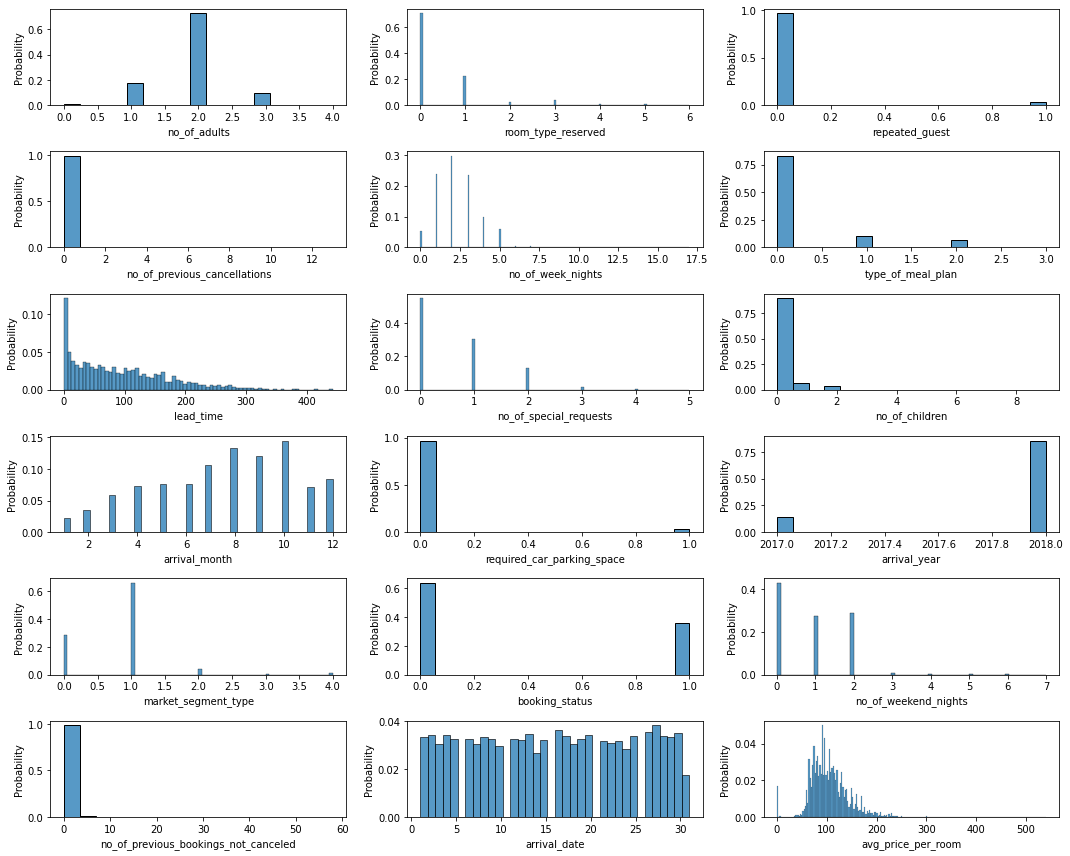

In [247]:
fig, axes = plt.subplots(6, 3, figsize=(15,12))
for idx, val in enumerate(list(set(combined_df.columns) - set(['id', 'is_generated']))):
    sns.histplot(data=combined_df, x=val, ax=axes[idx // 3, idx % 3],stat='probability')
    plt.xlabel = val
plt.tight_layout()
plt.show()

 Distribution of Features separated out by target

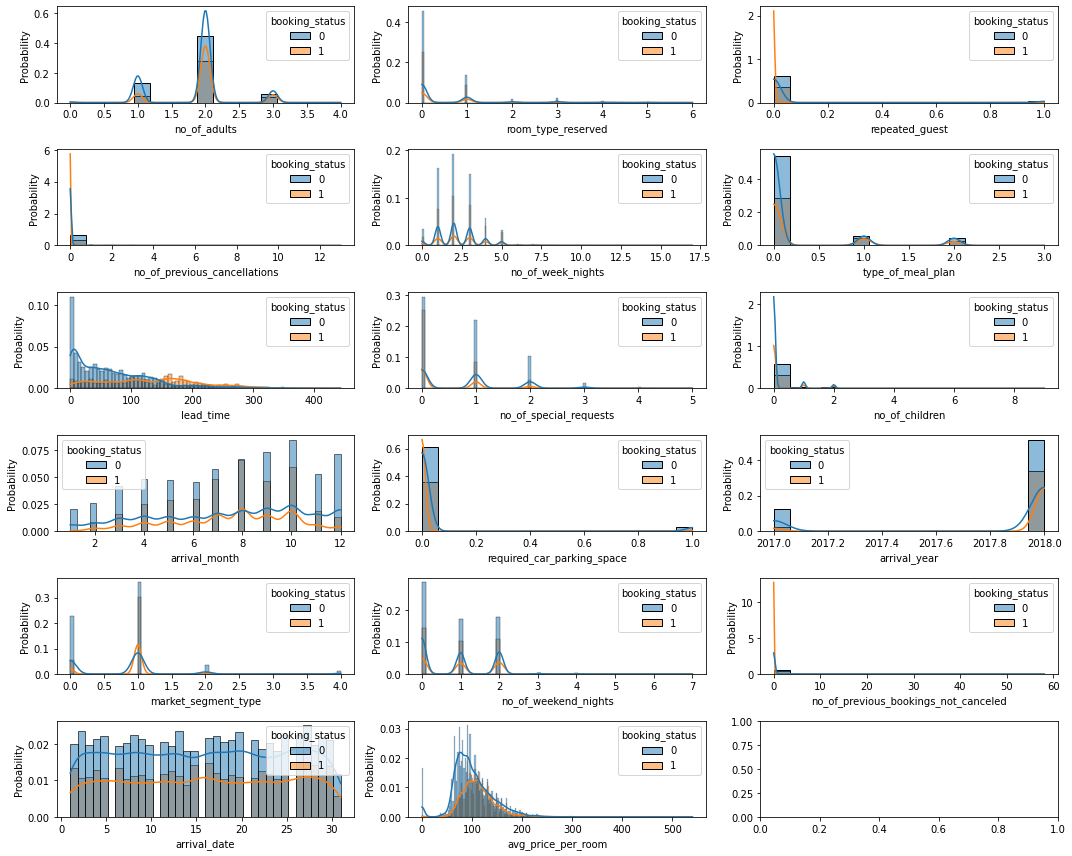

In [248]:
fig, axes = plt.subplots(6, 3, figsize=(15,12))
for idx, val in enumerate(list(set(combined_df.columns) - set(['id', 'is_generated', 'booking_status']))):
    sns.histplot(data=combined_df, x=val, ax=axes[idx // 3, idx % 3],stat='probability', hue='booking_status', kde=True)
    plt.xlabel = val
fig.tight_layout()
plt.show()

#Feature Engineering


* Prior Probability

  Add a feature to represent the prior probability of cancellation

In [249]:
def add_prior_prob(df):
    df['prior_prob'] = (df['no_of_previous_cancellations'] / \
        (df['no_of_previous_cancellations'] + df['no_of_previous_bookings_not_canceled'])).fillna(1)
    
    return df

In [250]:
combined_df = add_prior_prob(combined_df)
test = add_prior_prob(test)

In [251]:
test.head(4)

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,is_generated,prior_prob
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2,1,1.0
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0,1,1.0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1,1,1.0
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0,1,1.0




* Deal with Dates & Holidays

Add day_of_year & weak_of_year features to try to capture variation throughout the year

Experimented with flagging reservations around holidays but this worsened the CV

Experimented with features dividied by avg_price_per_room but this also worsened CV



In [252]:
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2017-01-01', end='2018-12-31')

In [253]:
def process_dates(df):
    
    # time columns
    temp = df.rename(columns={
        'arrival_year': 'year',
        'arrival_month': 'month',
        'arrival_date': 'day'
    })
    
    df['date'] = pd.to_datetime(temp[['year', 'month', 'day']],
                                errors='coerce')
    
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['dayofmonth'] = df['date'].dt.day 
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofyear'] = df['date'].dt.dayofyear
    df['weekofyear'] = df['date'].dt.isocalendar().week.astype(float)
    df['quarter'] = df['date'].dt.quarter

    # holiday columns
    df['is_holiday'] = 0
    df.loc[df['date'].isin(holidays)] = 1
 
    df.drop(columns=['date', 'arrival_year', 'arrival_month', 'arrival_date'], inplace=True)
    
    # new features
    df['no_of_adults_div_price'] = df.no_of_adults / (df.avg_price_per_room + 1e-6)
    df['no_of_children_div_price'] = df.no_of_children / (df.avg_price_per_room + 1e-6)
    df['lead_time_div_price'] = df.lead_time / (df.avg_price_per_room + 1e-6)
    return df

In [254]:
combined_df = process_dates(combined_df)
test = process_dates(test)

In [255]:
combined_df.is_holiday.value_counts()

0    51625
1     1244
Name: is_holiday, dtype: int64

In [256]:
test.is_holiday.value_counts()

0    27459
1      609
Name: is_holiday, dtype: int64

In [257]:
test[test["is_holiday"]==1]

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,...,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_holiday,no_of_adults_div_price,no_of_children_div_price,lead_time_div_price
16,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0.999999,0.999999,0.999999
69,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0.999999,0.999999,0.999999
144,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0.999999,0.999999,0.999999
201,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0.999999,0.999999,0.999999
209,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0.999999,0.999999,0.999999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27559,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0.999999,0.999999,0.999999
27574,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0.999999,0.999999,0.999999
27667,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0.999999,0.999999,0.999999
27735,1,1,1,1,1,1,1,1,1,1,...,1.0,1.0,1.0,1.0,1.0,1.0,1,0.999999,0.999999,0.999999


In [258]:
test.describe

<bound method NDFrame.describe of           id  no_of_adults  no_of_children  no_of_weekend_nights  \
0      42100             3               0                     1   
1      42101             2               0                     0   
2      42102             2               2                     0   
3      42103             2               0                     0   
4      42104             1               0                     0   
...      ...           ...             ...                   ...   
28063  70163             2               0                     1   
28064  70164             2               0                     2   
28065  70165             2               0                     1   
28066  70166             3               0                     0   
28067  70167             2               0                     2   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
0                      4                  0                           0   

#Preprocessing

Separate out the target booking_status from the rest of the data



In [260]:
# drop id column as this gives no signal
y = combined_df['booking_status']
test_ids = test['id']

combined_df.drop(axis=1,columns=['id', 'booking_status'], inplace=True)
test.drop(axis=1, columns=['id'], inplace=True)

Scaling

Scale all the columns (they are all numerical) to balance the features out for the model.

In [261]:
robust_scaler = RobustScaler()
robust_cols = ['avg_price_per_room', 'lead_time']

standard_scaler = StandardScaler()
standard_cols = list(set(combined_df.columns) - set(robust_cols))

preprocessor = ColumnTransformer(transformers=[('standard_scaler',standard_scaler, standard_cols),
                                               ('robust_scaler', robust_scaler, robust_cols)],
                                 verbose_feature_names_out=True, remainder='passthrough')

In [262]:
scaled_df = pd.DataFrame()
scaled_test_df = pd.DataFrame()

In [263]:
scaled_df[combined_df.columns] = preprocessor.fit_transform(combined_df)
scaled_test_df[test.columns] = preprocessor.transform(test)

In [264]:
scaled_df.sample(13)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,...,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_holiday,no_of_adults_div_price,no_of_children_div_price,lead_time_div_price
19920,-0.119888,0.166972,0.196649,3.022412,-0.238303,-0.121225,5.261443,-0.051897,0.484639,-0.448938,...,-1.501038,0.320499,3.553924,0.199195,-0.034849,-0.155232,-0.115108,0.251401,2.362009,-0.262712
6766,-0.119888,0.166972,0.196649,0.648654,-0.238303,-0.121225,-0.231428,-0.051897,-0.287988,-0.448938,...,1.460691,0.320499,1.272292,-0.796364,-0.034849,-0.155232,-0.115108,-0.808139,0.894105,-0.152542
20065,-0.119888,0.166972,0.196649,-0.538225,-0.238303,-0.121225,-0.231428,-0.051897,1.478015,-0.448938,...,-0.020174,-1.282118,-1.009340,1.194754,-0.034849,-0.155232,-0.115108,1.332345,-0.533843,-0.127119
36916,-0.119888,0.166972,-1.659891,-0.538225,-0.238303,-0.121225,-0.231428,-0.051896,-0.287988,-0.448938,...,1.460691,0.320499,1.272292,-0.796364,-0.034849,-0.155232,-0.115108,-0.808139,0.334061,0.720339
24276,-0.119888,0.166972,0.196649,-0.538225,-0.238303,-0.121225,-0.231428,-0.051896,0.926139,-0.448938,...,-1.007417,0.320499,1.272292,0.199195,-0.034849,-0.155232,-0.115108,-0.037565,0.000000,0.762712
27863,-0.119888,0.166972,0.196649,-0.538225,-0.238303,-0.121225,-0.918037,-0.051897,-0.287988,1.306601,...,0.473448,0.320499,-1.009340,0.199195,-0.034849,-0.155232,-0.115108,-0.155291,-0.108079,0.237288
35545,-0.119888,0.166972,0.196649,0.648654,-0.238303,-0.121225,0.455181,-0.051896,-1.391739,-0.448938,...,0.967069,0.320499,-1.009340,1.194754,-0.034849,-0.155232,-0.115108,1.054082,-0.228166,1.949153
52161,9.925062,0.166972,0.196649,-0.538225,-0.238303,-0.121225,-1.604646,0.167093,1.478015,1.306601,...,-1.007417,0.320499,-1.009340,-0.796364,-0.034849,-0.155232,-0.115108,-0.636900,-2.171397,-0.610169
5790,-0.119888,0.166972,0.196649,0.648654,-0.238303,-0.121225,0.455181,-0.051897,-1.060614,-0.448938,...,0.967069,0.320499,-1.009340,1.194754,-0.034849,-0.155232,-0.115108,0.754414,0.717249,0.110169
24764,-0.119888,0.166972,0.196649,-0.538225,-0.238303,-0.121225,1.141790,-0.051896,1.698765,-0.448938,...,0.473448,0.320499,1.272292,0.199195,-0.034849,-0.155232,-0.115108,0.369127,0.164847,1.694915


In [265]:
scaled_test_df.tail(6)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,...,month,dayofmonth,dayofweek,dayofyear,weekofyear,quarter,is_holiday,no_of_adults_div_price,no_of_children_div_price,lead_time_div_price
28062,-0.119888,0.166972,0.196649,-0.538225,-0.238303,-0.121225,-1.604646,-0.051896,-1.281364,-0.448938,...,-0.020174,-1.282118,0.131476,1.194754,-0.034849,-0.155232,-0.115108,0.733010,-0.206332,2.330508
28063,-0.119888,0.166972,0.196649,-0.538225,-0.238303,-0.121225,-0.231428,-0.051896,1.588390,-0.448938,...,1.460691,0.320499,0.131476,0.199195,-0.034849,-0.155232,-0.115108,0.690200,1.322052,2.042373
28064,-0.119888,0.166972,0.196649,-0.538225,-0.238303,-0.121225,-0.231428,-0.051896,1.036514,-0.448938,...,1.460691,-1.282118,1.272292,-1.791924,-0.034849,-0.155232,-0.115108,-1.332557,-0.752183,0.059322
28065,-0.119888,0.166972,0.196649,-0.538225,-0.238303,-0.121225,-0.231428,-0.051897,0.705389,-0.448938,...,-1.501038,-1.282118,0.131476,1.194754,-0.034849,-0.155232,-0.115108,0.925653,-0.315502,-0.288136
28066,-0.119888,0.166972,2.053189,0.648654,-0.238303,-0.121225,1.141790,-0.051897,-1.060614,-0.448938,...,-0.020174,0.320499,-1.009340,0.199195,-0.034849,-0.155232,-0.115108,0.433342,1.382096,-0.593220
28067,-0.119888,0.166972,0.196649,-0.538225,-0.238303,-0.121225,0.455181,-0.051896,1.367640,-0.448938,...,-1.007417,0.320499,1.272292,0.199195,-0.034849,-0.155232,-0.115108,0.337020,-0.330568,0.991525


Feature Importances

look at feature importances to see how our feature engineering has performed

<Axes: >

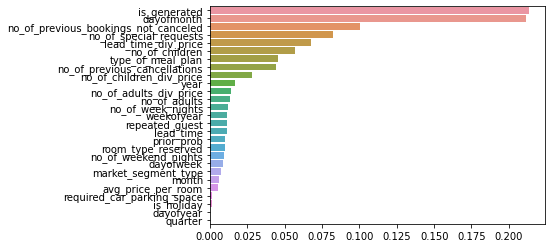

In [266]:
clf = XGBClassifier()
fit = clf.fit(scaled_df, y)
importances = pd.Series(fit.feature_importances_, index=scaled_df.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
sns.barplot(x=importances.values, y=importances.index)

#Modelling
Choose XGBClassifier(), CatBoostClassifier() and LGBMClassifier() as these models returned the best CV.


In [267]:
xgb_params = {'colsample_bytree': 0.67, # 0.99
             'gamma': 0.16,
             'learning_rate': 0.1,
             'max_depth': 4, #5
             'min_child_weight': 3,
             'n_estimators': 2000, #400
             'subsample': 0.77}
            # 'tree_method': 'gpu_hist'

In [268]:
catboost_params = {'silent':True,
                   'depth': 5,
                   'learning_rate': 0.22,
                   'n_estimators': 950}

In [269]:
lgbm_params = {'max_depth': 6,
               'learning_rate': 0.13,
               'n_estimators': 400,
               'lambda_l1': 1.13,
               'lambda_l2': 0.61,
               'min_data_in_leaf': 114}

In [270]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
# untuned models
xgb_cv_scores = cross_val_score(XGBClassifier(), scaled_df, y, cv=skf, scoring='roc_auc', n_jobs=-1)
catboost_cv_scores = cross_val_score(CatBoostClassifier(silent=True), scaled_df, y, cv=skf, scoring='roc_auc', n_jobs=-1)
lgbm_cv_scores = cross_val_score(LGBMClassifier(), scaled_df, y, cv=skf, scoring='roc_auc', n_jobs=-1)
cv_scores = [np.mean(xgb_cv_scores), np.mean(catboost_cv_scores), np.mean(lgbm_cv_scores)]

print(f"XGB ROC-AUC Score: {np.mean(xgb_cv_scores):.4f}")
print(f"CatBoost ROC-AUC Score: {np.mean(catboost_cv_scores):.4f}")
print(f"LGBM ROC-AUC Score: {np.mean(lgbm_cv_scores):.4f}")
print(f"Mean ROC-AUC Score: {np.mean(cv_scores):.4f}")


XGB ROC-AUC Score: 0.9172
CatBoost ROC-AUC Score: 0.9168
LGBM ROC-AUC Score: 0.9150
Mean ROC-AUC Score: 0.9163


In [271]:
from sklearn.metrics import accuracy_score

In [276]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
# tuned models
tuned_xgb_cv_scores = cross_val_score(XGBClassifier(), scaled_df, y, cv=skf, scoring='roc_auc', n_jobs=-1)
tuned_catboost_cv_scores = cross_val_score(CatBoostClassifier(**catboost_params), scaled_df, y, cv=skf, scoring='roc_auc', n_jobs=-1)
tuned_lgbm_cv_scores = cross_val_score(LGBMClassifier(**lgbm_params), scaled_df, y, cv=skf, scoring='roc_auc', n_jobs=-1)
tuned_cv_scores = [np.mean(tuned_xgb_cv_scores), np.mean(tuned_catboost_cv_scores), np.mean(tuned_lgbm_cv_scores)]

print(f"Tuned XGB ROC-AUC Score: {np.mean(tuned_xgb_cv_scores):.4f}")
print(f"Tuned CatBoost ROC-AUC Score: {np.mean(tuned_catboost_cv_scores):.4f}")
print(f"Tuned LGBM ROC-AUC Score: {np.mean(tuned_lgbm_cv_scores):.4f}")
print(f"========================")
print(f"Mean Tuned ROC-AUC Score: {np.mean(tuned_cv_scores):.4f}")

Tuned XGB ROC-AUC Score: 0.9172
Tuned CatBoost ROC-AUC Score: 0.9169
Tuned LGBM ROC-AUC Score: 0.9193
Mean Tuned ROC-AUC Score: 0.9178


In [277]:
xgb_clf = XGBClassifier(**xgb_params)
xgb_clf.fit(scaled_df, y)
xgb_test_preds = xgb_clf.predict_proba(scaled_test_df.values)[:,1]

catboost_clf = CatBoostClassifier(**catboost_params)
catboost_clf.fit(scaled_df, y)
catboost_test_preds = catboost_clf.predict_proba(scaled_test_df.values)[:,1]

lgbm_clf = LGBMClassifier(**lgbm_params)
lgbm_clf.fit(scaled_df, y, verbose=False)
lgbm_test_preds = lgbm_clf.predict_proba(scaled_test_df.values)[:,1]

test_preds = np.stack((xgb_test_preds, catboost_test_preds, lgbm_test_preds)).mean(0)

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] lambda_l1 is set=1.13, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.13
[LightGBM] [Warning] min_data_in_leaf is set=114, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=114
[LightGBM] [Warning] lambda_l2 is set=0.61, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.61
